In [1]:
## unfilled metadata classification
import pandas as pd

df = pd.read_csv('../dataset/metadata_unfilled.csv')

In [2]:
df = df.drop(columns=['patient_id', 'lesion_id', 'img_id'])

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df.drop(columns=['diagnostic'])
Y = df['diagnostic']

In [4]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

Y = label_encoder.fit_transform(Y)

print("Classes:", label_encoder.classes_)


Classes: ['ACK' 'BCC' 'MEL' 'NEV' 'SCC' 'SEK']


In [5]:
X = pd.get_dummies(X, drop_first=True)

In [6]:
def convert_to_bool(value):
    if isinstance(value, str):
        if value == "True":
            return True
        elif value == "False":
            return False
    return value

df = df.map(convert_to_bool)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y,
    test_size=0.2,
    random_state=42,
    stratify=Y
)

In [8]:
from xgboost import XGBClassifier
model = XGBClassifier(eval_metric='mlogloss')

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [9]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8130434782608695


Classification Report:
              precision    recall  f1-score   support

         ACK       0.86      0.85      0.85       146
         BCC       0.82      0.88      0.85       169
         MEL       1.00      0.40      0.57        10
         NEV       0.84      0.88      0.86        49
         SCC       0.60      0.64      0.62        39
         SEK       0.79      0.64      0.71        47

    accuracy                           0.81       460
   macro avg       0.82      0.71      0.74       460
weighted avg       0.82      0.81      0.81       460



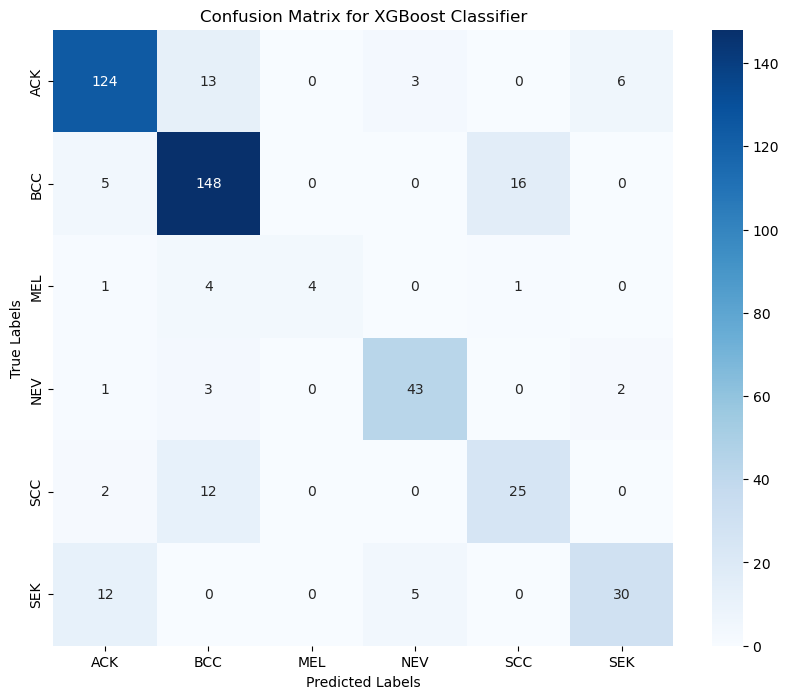

In [10]:
# Classification report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['ACK', 'BCC', 'MEL', 'NEV', 'SCC', 'SEK']))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['ACK', 'BCC', 'MEL', 'NEV', 'SCC', 'SEK'], yticklabels=['ACK', 'BCC', 'MEL', 'NEV', 'SCC', 'SEK'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for XGBoost Classifier")
plt.show()